

חלק ב- check data frame info & change names
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     200 non-null    object 
 1   product  200 non-null    object 
 2   area     200 non-null    object 
 3   amount   195 non-null    float64
 4   price    200 non-null    int64  
 5   total    189 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB




,date,product,area,amount,price,total
1,22/06/2024,מסך מחשב,צפון,19.000000,2028,nan
7,09/06/2024,מסך מחשב,מרכז,nan,1087,20653.000000
22,15/05/2024,טלפון חכם,דרום,11.000000,2301,nan
28,30/05/2024,מסך מחשב,צפון,19.000000,1202,nan
45,14/06/2024,אוזניות,מרכז,nan,3379,37169.000000
54,29/01/2024,טלפון חכם,דרום,5.000000,2534,nan
74,01/03/2024,אוזניות,צפון,7.000000,903,nan
94,11/01/2024,טלפון חכם,צפון,7.000000,3737,nan
107,12/03/2024,מסך מחשב,דרום,9.000000,2576,nan
138,03/02/2024,אוזניות,מרכז,16.000000,797,nan



 1.b. checking all changes: nan=>0 & float=>int
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     200 non-null    object
 1   product  200 non-null    object
 2   area     200 non-null    object
 3   amount   200 non-null    int32 
 4   price    200 non-null    int64 
 5   total    200 non-null    int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 7.9+ KB



 2.a. The sum of all income is 4,718,224




,month,total
0,1,"647,715"
1,2,"590,838"
2,3,"809,669"
3,4,"773,873"
4,5,"892,461"
5,6,"1,003,668"




2.c. The product with the most units sold is 'אוזניות' with 579 units.


2.d. The area with the heighest income is 'דרום' with 1,671,832 in total sales.


3.a+b. In the plot it shows in the 2nd & 4th months there is a significant decrease in sales 
 This could be due to change in workers, holidays, war


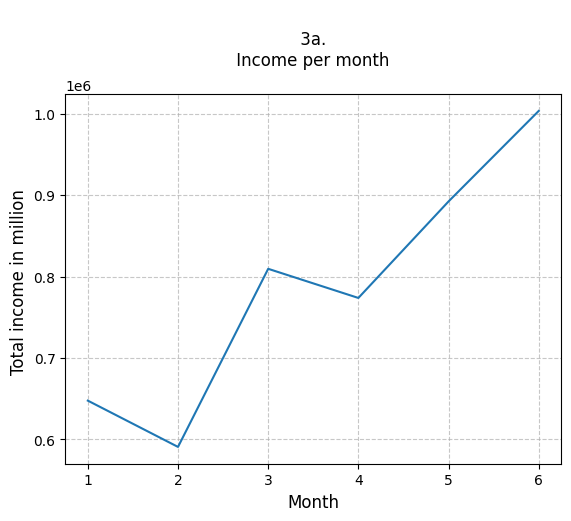

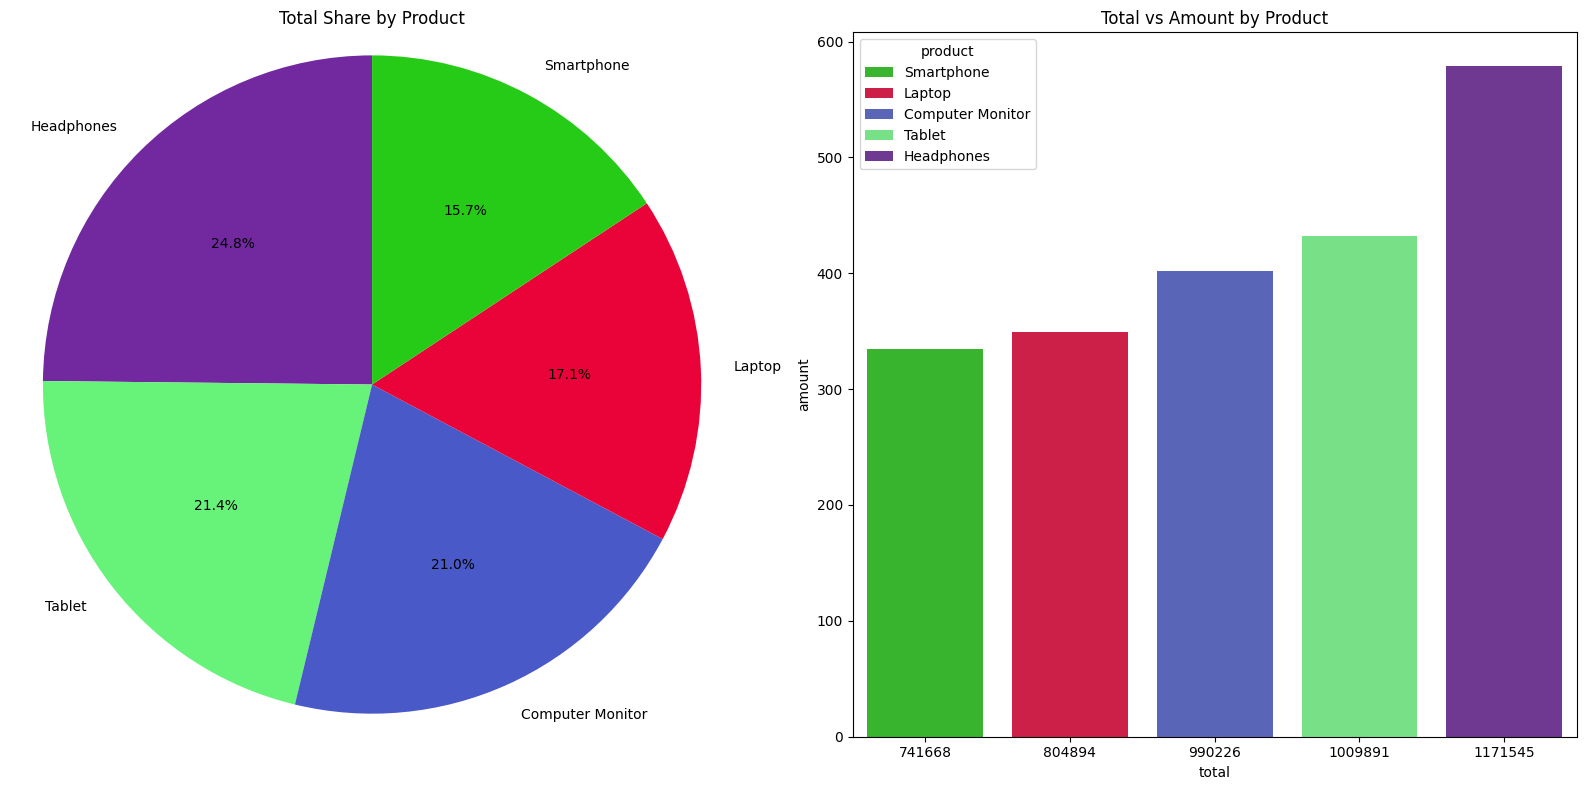

In [3]:
# imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from random import randint
import pandasql as psql
import seaborn as sb
from matplotlib import pyplot
from matplotlib import ticker
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import math

#חלק ב
#import csv to df & info
#change columns names and view df info
mynames=["date","product","area","amount","price","total"]
df=pd.read_csv("sales_data_utf8.csv",names=mynames,header=0,usecols=mynames)
print('\n')
print('חלק ב- check data frame info & change names')
df.info()
print('\n')


#-1. בדיקת איכות נתונים 
#--a. מצא את כל השורות בהם נתונים חסרים
nan_rows=df[df.isna().any(axis=1)]
display(nan_rows.style.set_caption("1.a. The following rows have missing data"))

#--b. הסבר כיצד לטפל בנתונים החסרים
# replace NaN values with 0
df=df.fillna(0)
#replace float with int for beter calculations
df['amount']=df['amount'].astype(int) 
df['total']=df['total'].astype(int)
#check df info to see all changes: nan=>0 & float=>int
print('\n','1.b. checking all changes: nan=>0 & float=>int')
df.info()
#calculate amount with 0
calAm=df['amount']==0
df.loc[calAm,'amount']=df.loc[calAm,'total']/df.loc[calAm,'price']
#calculate total with 0
calTo=df['total']==0
df.loc[calTo,'total']=df.loc[calTo,'amount']*df.loc[calTo,'price']
print('\n')


#-2 חישובים וסיכומים
#--a חישוב סך כל ההכנסות
sumTotal=df['total'].sum()
print('\n',f"2.a. The sum of all income is {sumTotal:,.0f}")
print('\n')

#--b מצא את ההכנסה הכוללת לכל חודש
type(df['date'])
# Convert text to datetime
df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')
#add column
df['month']=df['date'].dt.month
#create df for month income
mi=df.groupby('month')['total'].sum()
mi=mi.reset_index()

# Display with commas in the 'total' column
display(mi.style.set_caption("2.b. The total income for each month").format({'total': '{:,.0f}'}))
print('\n')

#--c המוצר שנמכר בכמות יחידות הגדולה ביותר
#group by product
bp=df.groupby('product')['amount'].sum()
bp=bp.reset_index()
#ssort and save the first row 
bp=bp.sort_values(by='amount',ascending=False).head(1)
#save values to varebles for printing nice answer
product_name=bp.loc[0]['product']
units_sold=bp.iloc[0]['amount']
print(f"2.c. The product with the most units sold is '{product_name}' with {units_sold:,} units.")
print('\n')

#--d האזור עם ההכנסה הכי גבוה
ba=df.groupby('area')['total'].sum()
ba=ba.reset_index()
ba.sort_values(by='total',ascending=False).head(1)
area_name=ba.loc[0]['area']
total_sold=ba.iloc[0]['total']
print(f"2.d. The area with the heighest income is '{area_name}' with {total_sold:,} in total sales.")
print('\n')

#-3 איתור מגמות
#--a האם יש חודש עם ירידה משמעותית במכירות
sb.lineplot(x='month',y='total',data=mi)
print('3.a+b. In the plot it shows in the 2nd & 4th months there is a significant decrease in sales','\n','This could be due to change in workers, holidays, war')
pyplot.ylabel('Total income in million ', fontsize=12, rotation=90)
pyplot.xlabel('Month', fontsize=12, rotation=0)
pyplot.grid(True, which='major', axis='both', linestyle='--', alpha=0.7)
pyplot.title('\n 3a. \n Income per month \n',fontsize=12)
pyplot.show()

#-4 מסקנות
#group area and calculate totals
ct = df.groupby('area').agg(Total_Amount=('amount', 'sum'),Total_Income=('total', 'sum')).reset_index()
ct = ct.sort_values(by='Total_Income', ascending=False)
ct.style.format({'Total_Amount': '{:,.0f}','Total_Income': '{:,.0f}'})


bp=(df.groupby('product', as_index=False).agg({'amount': 'sum', 'total': 'sum'}).sort_values(by='amount', ascending=False))
#product name hebrew=>english 
hebrew_to_english={
    'אוזניות':'Headphones',
    'טאבלט':'Tablet',
    'מסך מחשב':'Computer Monitor',
    'מחשב נייד':'Laptop',
    'טלפון חכם':'Smartphone'
}
#replace product names
bp['product']=bp['product'].replace(hebrew_to_english)
#generate random colors for products
color=[]
nCol=bp['product'].nunique()
for i in range(nCol):
    color.append('#%06X'%randint(0, 0xFFFFFF))
dfC=pd.DataFrame({
    'product': bp['product'].unique(),
    'color': color
})
bp=bp.merge(dfC, on='product',how='left')
#map dictionary for seaborn
product_color_map=dict(zip(bp['product'].unique(),bp['color'].unique()))


#subplots
fig, axes=plt.subplots(1, 2,figsize=(16, 8))
#pie plot
axes[0].pie(
    bp['total'],
    labels=bp['product'],
    autopct='%0.1f%%',
    startangle=90,
    colors=bp['color'])
axes[0].set_title('Total Share by Product')
axes[0].axis('equal')

#bar plot
sb.barplot(
    data=bp,
    x='total',
    y='amount',
    hue='product',
    ax=axes[1],
    palette=product_color_map)
axes[1].set_title('Total vs Amount by Product')

plt.tight_layout()
plt.show()